# Shopping Data Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv("customer_shopping_data.csv", index_col=False)

In [4]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [6]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


# Date Formatting And Day-Month-Year Splitting

In [ ]:
data[["day", "month", "year"]] = data["invoice_date"].str.split("/", expand = True)
# We split date column to day, month year columns

data['ConvertedDate'] = pd.to_datetime(data['invoice_date'])

data['month'] = data['ConvertedDate'].dt.month
data['year'] = data['ConvertedDate'].dt.year

invoice_date_column_todrop = ['invoice_date']
data.drop(invoice_date_column_todrop,axis=1,inplace=True)

# Calculating Total Price

In [9]:
data['total_price'] = data['quantity'] * data['price']
# total price column created by multiplying them. This is gonna be our output data

In [10]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,day,month,year,ConvertedDate,total_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,5,5,2022,2022-05-08,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,12,12,2021,2021-12-12,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,9,9,2021,2021-09-11,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,16,5,2021,2021-05-16,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,24,10,2021,2021-10-24,242.40


In [11]:
data.isnull().sum()
# there is no null cell in our dataset

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
shopping_mall     0
day               0
month             0
year              0
ConvertedDate     0
total_price       0
dtype: int64

# Outliners and Age To Categorical

<AxesSubplot: >

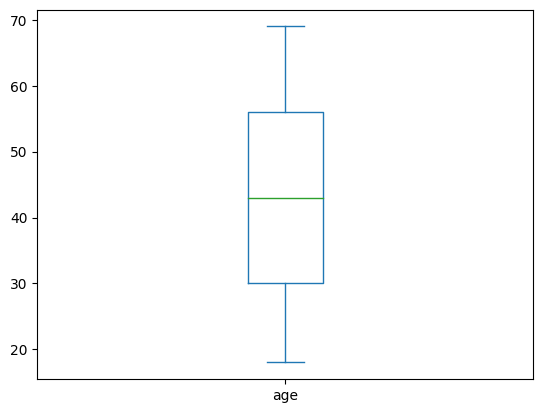

In [12]:
age=data["age"]
age.plot.box()

In [13]:
def age_categorical(ages):
    if ages <=30:
        ages= 'young'
    elif ages >30 and ages <=50:
        ages= 'middle'
    else:
        ages= 'old'
    return ages

In [14]:
# Create Age  categorical column
data['age_categorical'] = data['age'].apply(age_categorical)

# Distribution of categorical variables

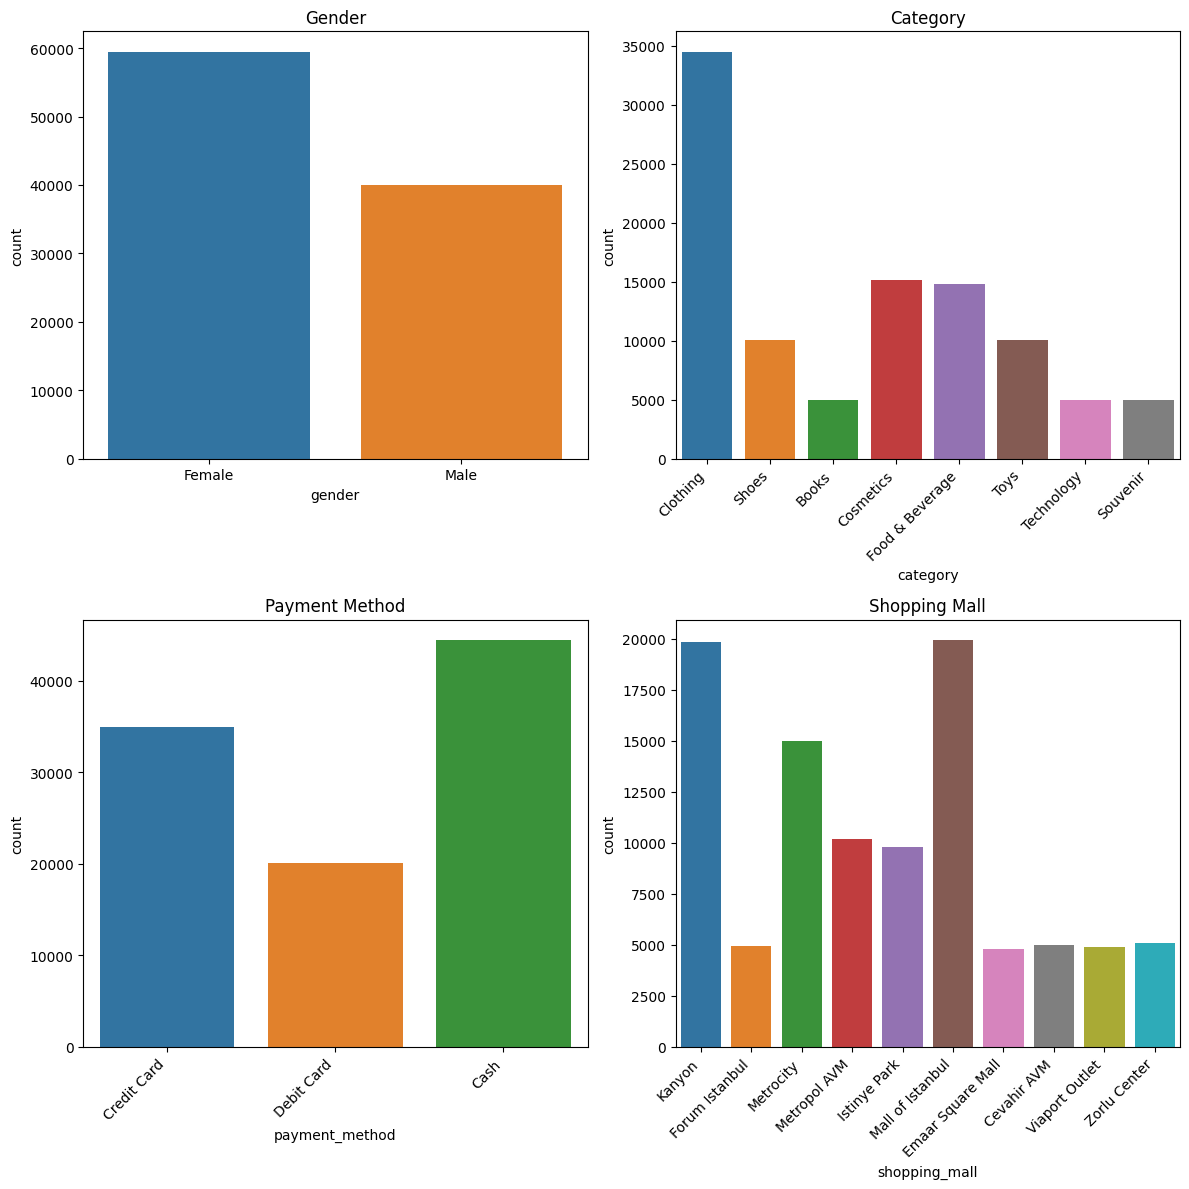

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

sns.countplot(data=data, x='gender', ax=axes[0, 0])
axes[0, 0].set_title('Gender')

sns.countplot(data=data, x='category', ax=axes[0, 1])
axes[0, 1].set_title('Category')
plt.setp(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

sns.countplot(data=data, x='payment_method', ax=axes[1, 0])
axes[1, 0].set_title('Payment Method')
plt.setp(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

sns.countplot(data=data, x='shopping_mall', ax=axes[1, 1])
axes[1, 1].set_title('Shopping Mall')
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Spending Habits On 3 Categories Based On Age Group

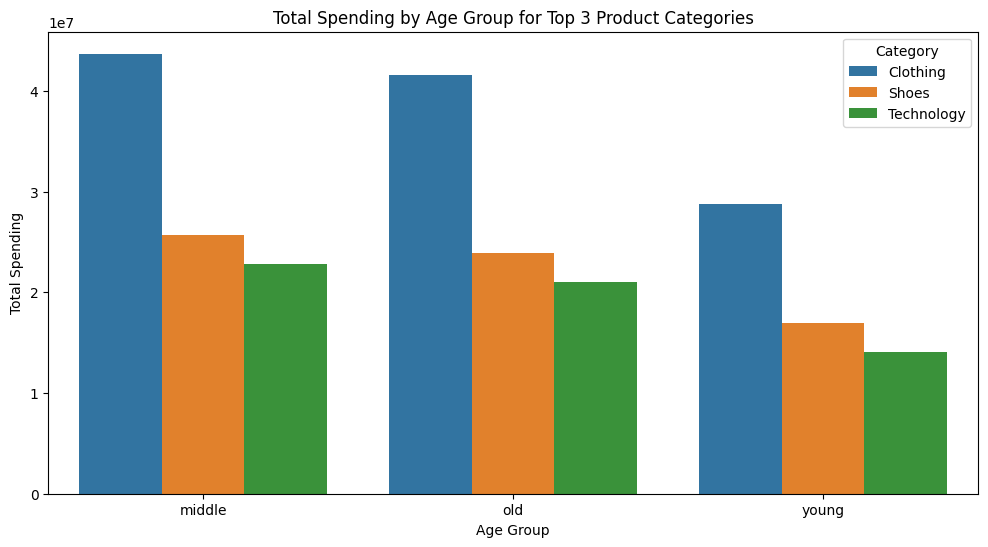

In [16]:
age_category_spendings = data.groupby(['age_categorical', 'category'])['total_price'].sum().reset_index(name='sum_total_price')

# Find the top 3 categories with the highest total spending
top_categories = age_category_spendings.groupby('category')['sum_total_price'].sum().nlargest(3).index

# Filter the DataFrame to only include the top 3 categories
age_category_spendings_top3 = age_category_spendings[age_category_spendings['category'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.barplot(data=age_category_spendings_top3, x='age_categorical', y='sum_total_price', hue='category')
plt.title('Total Spending by Age Group for Top 3 Product Categories')
plt.ylabel('Total Spending')
plt.xlabel('Age Group')

plt.legend(title='Category')
plt.show()

# relationships between variables

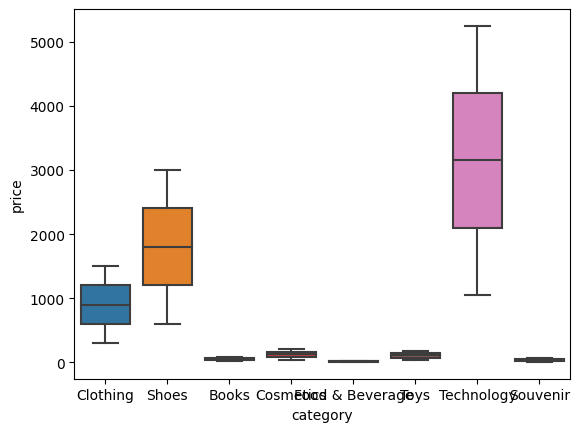

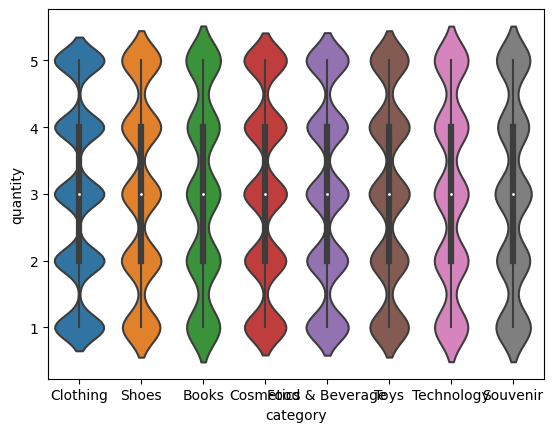

In [17]:
sns.boxplot(data=data, x='category', y='price')
plt.show()

sns.violinplot(data=data, x='category', y='quantity')
plt.show()

# Analysing time-based patterns

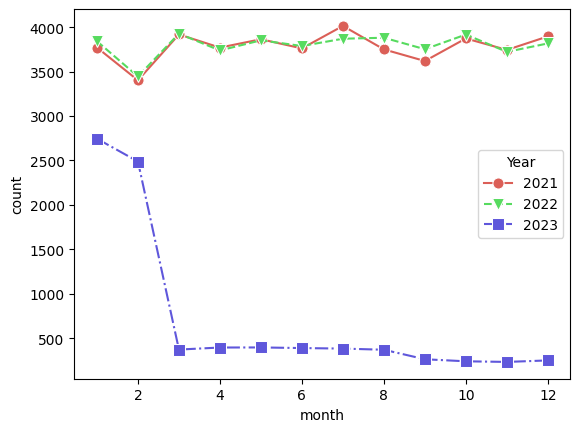

In [18]:
monthly_sales = data.groupby(['month', 'year']).size().reset_index(name='count')

palette = sns.color_palette("hls", len(monthly_sales['year'].unique()))
linestyles = ['-', '--', '-.', ':']
markerstyles = ['o', 'v', 's', 'D']

for idx, year in enumerate(monthly_sales['year'].unique()):
    sns.lineplot(data=monthly_sales[monthly_sales['year'] == year], x='month', y='count', 
                 color=palette[idx], linestyle=linestyles[idx], marker=markerstyles[idx], 
                 label=f'{year}', markersize=8)
    
plt.legend(title='Year')
plt.show()


# Correlation analysis

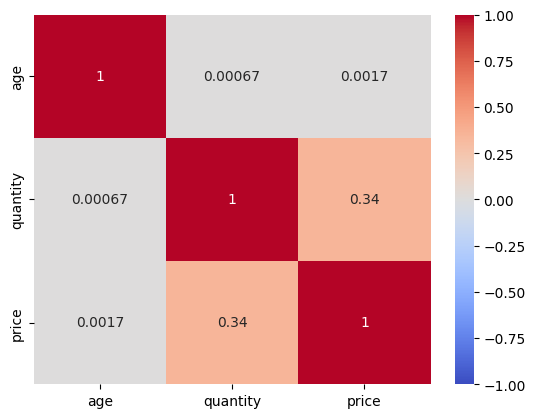

In [19]:
corr_matrix = data[['age', 'quantity', 'price']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

# Sales Relation Between Category and The Shopping Mall

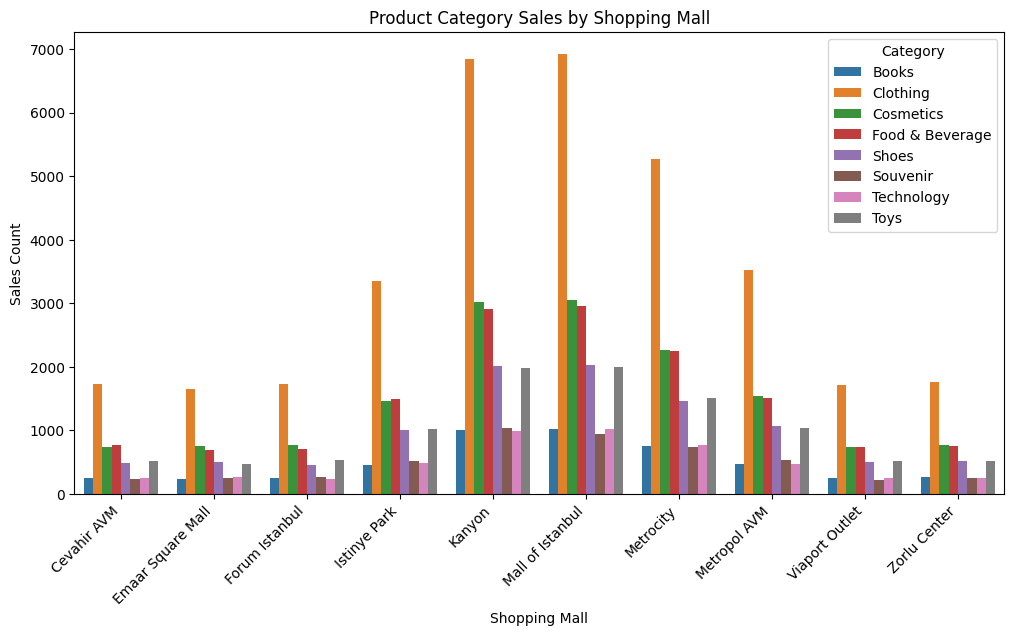

In [20]:
category_sales_by_mall = data.groupby(['shopping_mall', 'category']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales_by_mall, x='shopping_mall', y='count', hue='category')
plt.title('Product Category Sales by Shopping Mall')
plt.ylabel('Sales Count')
plt.xlabel('Shopping Mall')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.show()

In [21]:
category_sales_by_mall = data.groupby(['shopping_mall', 'category']).size().reset_index(name='count')

pivot_table = category_sales_by_mall.pivot_table(index='shopping_mall', columns='category', values='count', fill_value=0)

# Calculate total sales per shopping mall and sort
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values(by='Total', ascending=False)
pivot_table = pivot_table.drop(columns=['Total'])

# Display the pivot table using pandas.DataFrame.style
styled_pivot_table = pivot_table.style.background_gradient(cmap='Blues', axis=1)

styled_pivot_table

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Mall of Istanbul,1025,6923,3050,2957,2023,948,1017,2000
Kanyon,1013,6840,3023,2909,2017,1037,997,1987
Metrocity,752,5268,2265,2244,1457,738,772,1515
Metropol AVM,476,3525,1541,1517,1074,531,464,1033
Istinye Park,462,3353,1458,1490,1001,515,487,1015
Zorlu Center,261,1761,764,750,519,257,250,513
Cevahir AVM,258,1729,732,772,490,240,256,514
Forum Istanbul,252,1729,770,712,458,261,234,531
Viaport Outlet,246,1708,734,733,497,225,256,515


# Uniqness And Duplicated Rows

In [22]:
categorical_input = ['gender', 'category',
                       'payment_method', 'shopping_mall']
# those are categorical feauters

numerical_inputs = ['age','quantity','month','year']
# those are numerical

price = data['total_price']
# this is gonna be our output data, we trying to predict

In [23]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,day,month,year,ConvertedDate,total_price,age_categorical
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,5,5,2022,2022-05-08,7502.00,young
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,12,12,2021,2021-12-12,5401.53,young
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,9,9,2021,2021-09-11,300.08,young
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,16,5,2021,2021-05-16,15004.25,old
4,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,24,10,2021,2021-10-24,242.40,old


In [24]:
uniqness_categorical = data[categorical_input]
for col in uniqness_categorical:
    print('Features: ',col,'--',uniqness_categorical[col].unique())

Features:  gender -- ['Female' 'Male']
Features:  category -- ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Features:  payment_method -- ['Credit Card' 'Debit Card' 'Cash']
Features:  shopping_mall -- ['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center']


In [25]:
# Assuming your DataFrame is named 'df'
duplicated_rows_based_on_invoice_no = data[data.duplicated(subset=['invoice_no'], keep=False)]

print("Rows with duplicated 'invoice_no':")
print(duplicated_rows_based_on_invoice_no)


Rows with duplicated 'invoice_no':
Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, shopping_mall, day, month, year, ConvertedDate, total_price, age_categorical]
Index: []


In [26]:
null_count=data.isnull().sum().to_frame().reset_index()
null_count.columns= ['Column Name', 'Number of Null Values']

print("Number of null values in each column:")
print(null_count)

Number of null values in each column:
        Column Name  Number of Null Values
0        invoice_no                      0
1       customer_id                      0
2            gender                      0
3               age                      0
4          category                      0
5          quantity                      0
6             price                      0
7    payment_method                      0
8     shopping_mall                      0
9               day                      0
10            month                      0
11             year                      0
12    ConvertedDate                      0
13      total_price                      0
14  age_categorical                      0


In [27]:
data.to_csv("processed_dataset_final.csv", index=False)